# Word Embedding
> "NLP"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 이강철
- categories: [python]
- hide :false

# WordEmbedding

`1`. 차원의 저주(Curse of Dimensionality) : 수학적 공간 차원(=변수 개수)이 늘어나면서, 문제 계산법이 지수적으로 커지는 상황

만약 $x=[1,2,3,4,5],\, y= [0,0,0,0,0]\to (X,Y)$ 을 표현한다고 하자

아래와 같이 1차원 상에서 표현되는 정보를 2차원 상에서 표현하게되어 설명 공간이 $5^2 =25$가 된 것이다.

이러한 경우를 차원의 저주라고 하며 이는 모델링 과정에서 저장 공간과 처리 시간이 불필요하게 증가됨을 의미한다.

In [54]:
#collapse-hide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

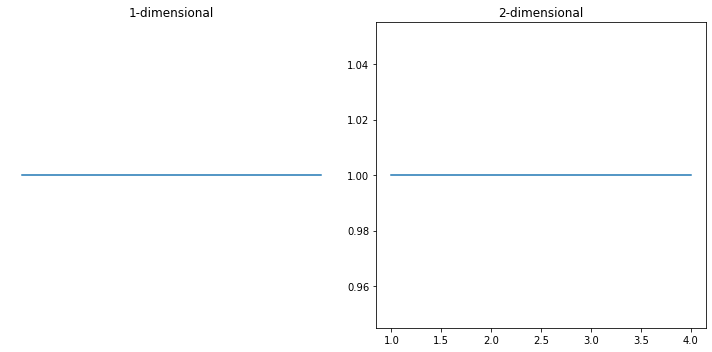

In [55]:
#collapse-hide
fig, axes = plt.subplots(1,2, figsize=(10,5))

ax1, ax2 =axes

ax1.plot(x,y)
ax1.set_title("1-dimensional")
ax1.axis("off")
ax2.plot(x,y)
ax2.set_title("2-dimensional")
fig.tight_layout()

이러한 문제점을 해결하기 위해 NLP 분야에서는 단어를 저차원에 표현하기 위한 **"워드 임베딩(Word Embedding)"**을 제안하였다.

`-` 가정1 : 유사한 의미를 가진 단어는 유사한 문맥안에서 발견된다.

`-` 이점 :이웃된 단어들의 단어 벡터들을 학습하여 단어간 유사성을 도출해낼 수 있다.

`-` example : 다음과 같은 `프라닭`, `교촌치킨`이라는 단어와 문장이 있다고 하자. 문장의 개수는 $j=2$, 단어의 개수는 총 $i=6$ 이다.
    
`문장1`: 금요일 밤에 `프라닭`은 못참지

`문장2`: 불금인데 `교촌치킨`에 맥주?

`단어` : [ "금요일", "밤", "프라닭","불금", "교촌치킨", "맥주" ]

$\divideontimes$ 우리는 위와 같이 유사한 문장내에서 유사한 의미를 가진 단어가 존재한다는 가정하에 단어간 유사성을 도출낼 수있는 것이다.

이제 이러한 임베딩 기법 중 하나인 **"Word2Vec"** 기법을 소개한다.

## Word2Vec

* 워드 임베딩 기법 중 가장 대표적인 방법으로 **"CBOW"**, **"skip-gram"** 이 존재한다.

### CBOW 

* 주변 단어를 이용하여 중심단어를 예측한다.

* 주어진 문맥에서 window size $k$ 를 적용해 target word 양옆에 $k$개의 단어들을 이용하여 조건부 확률을 계산한다. 편의상 k=1 이라고 설정 

* 문장의 개수는 $j=2$, 단어의 개수는 총 $i=6$, 축소할 차원의 개수는 $n=3$ 으로 설정하자.

* 생성되는 가중치 행렬은 $(i \times n) = (6 \times 3)$ 으로 파이토치 기준 $N(0,1)$에서 생성된다.

* 우리는 `프라닭` 이라는 단어를 예측한다고 가정한다.

`문장1`: 금요일 밤에 `프라닭`은 못참지

`문장2`: 불금인데 교촌치킨 에 맥주?

`단어` : [ "금요일", "밤", "프라닭","불금", "교촌치킨", "맥주" ]

`1`. one-hot vector 생성

In [96]:
#collapse-hide
import numpy as np
import pandas as pd

index = [ "금요일", "밤", "프라닭","불금", "교촌치킨", "맥주" ]

word1 = [1,0,0,0,0,0]
word2 = [0,1,0,0,0,0]
word3 = [0,0,1,0,0,0]
word4 = [0,0,0,1,0,0]
word5 = [0,0,0,0,1,0]
word6 = [0,0,0,0,0,1]

one_hot = pd.DataFrame([word1,word2,word3,word4,word5,word6],index=index)
one_hot

,0,1,2,3,4,5
금요일,1,0,0,0,0,0
밤,0,1,0,0,0,0
프라닭,0,0,1,0,0,0
불금,0,0,0,1,0,0
교촌치킨,0,0,0,0,1,0
맥주,0,0,0,0,0,1


`2`. 가중치 행렬 생성

In [92]:
#collapse-hide
W = np.random.normal(loc = 0, scale=1,size=18).reshape(6,3)
W = pd.DataFrame(W,index=index, columns = ["W1","W2","W3"])
W

,W1,W2,W3
금요일,0.814848,0.713584,-0.797810
밤,1.293895,0.333261,1.123483
프라닭,-0.665611,-0.889481,-0.911588
불금,0.110452,0.867829,0.370800
교촌치킨,0.846193,-0.379763,0.856476
맥주,0.767151,-0.571915,-0.680467


`3`. $\begin {align}\widehat W_{프라닭} = \frac {W_{밤} + W_{불금}} {2}  \end{align} = [0.7,0.6,0.5]$

In [174]:
#collapse-hide
W_1 = list((W.loc["밤"] + W.loc["불금"])/2)

`4`.  $ Z = \widehat W_{프라닭} \times  W^T = [ 0.4 ,  \,1.95,\, -1.68, \, 0.88,\,  1.01, \,-0.31]$

In [172]:
#collapse-hide
z = np.dot(np.array(W_1),W.T.to_numpy())

`5`.  $\hat y=softmax(Z)$

In [173]:
#collapse-hide
from scipy.special import softmax
y=[0,0,1,0,0,0]
pd.DataFrame({"y_hat": softmax(z), "y" : y},index=index)

,y_hat,y
금요일,0.102891,0
밤,0.481603,0
프라닭,0.012761,1
불금,0.164813,0
교촌치킨,0.187740,0
맥주,0.050192,0


`6`. 손실함수 계산 $cross- entorpy\left(\,\hat Y,Y\,\right)$

`7`. 역전파를 통해 $W_{밤},\, W_{불금}$ 업데이트

### Skip-gram

* Skip-gram의 경우 CBOW와 달리 중심단어를 가지고 주변단어를 예측하는 과정이다.

* 따라서 CBOW의 `3`번째 단계 window-size내의 주변 단어들의 합을 평균 내는 과정이 생략된다.

* 이러한 부분을 빼면 나머지와 동일하다.

참고문헌

skip-gram : https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/03/30/word2vec/

[Bengio, Yoshua, et al. "A neural probabilistic language model." Journal of machine learning research 3.Feb (2003): 1137-1155.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.jmlr.org%2Fpapers%2Fvolume3%2Ftmp%2Fbengio03a.pdf&clen=140095&chunk=true)


[Young, Tom, et al. "Recent trends in deep learning based natural language processing." ieee Computational intelligenCe magazine 13.3 (2018): 55-75.](https://ieeexplore.ieee.org/abstract/document/8416973)